In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

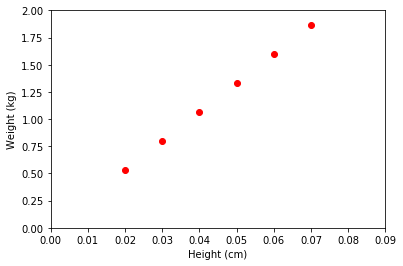

In [5]:
# height (cm)
X = np.array([[0.02, 0.03, 0.04, 0.05, 0.06, 0.07]]).T
# weight (kg).
y = np.array([[0.534,
0.799,
1.06904761904762,
1.3344761904761917,
1.5999047619047633,
1.8653333333333353
]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([0, 0.09, 0, 2])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

w =  [[1.38956916e-03]
 [2.66423129e+01]]
[0.005      0.01444444 0.02388889 0.03333333 0.04277778 0.05222222
 0.06166667 0.07111111 0.08055556 0.09      ]
[0.13460113 0.38622298 0.63784482 0.88946667 1.14108851 1.39271036
 1.6443322  1.89595404 2.14757589 2.39919773]


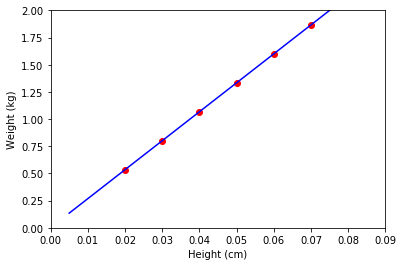

In [6]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(5, 90, 10)/1000
print(x0)
y0 = w_0 + w_1*x0
print(y0)
# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0, 'b')               # the fitting line
plt.axis([0, 0.09, 0, 2])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [7]:
Thu = w_1*0.04 + w_0
print(Thu)
Thu = w_1*0.05 + w_0
print(Thu)
Thu = w_1*0.06 + w_0
print(Thu)
Thu = w_1*0.07 + w_0
print(Thu)

1.0670820861678023
1.3335052154195037
1.599928344671205
1.8663514739229063


In [8]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[1.38956916e-03 2.66423129e+01]]
Solution found by (5):  [[1.38956916e-03 2.66423129e+01]]


In [9]:
print(regr.coef_[0][1])

26.642312925170117


In [10]:
from sklearn.metrics import r2_score
y_pred = w_0 + w_1*X
print(y_pred)
print(y)
r2_score(y, y_pred)

[[0.53423583]
 [0.80065896]
 [1.06708209]
 [1.33350522]
 [1.59992834]
 [1.86635147]]
[[0.534     ]
 [0.799     ]
 [1.06904762]
 [1.33447619]
 [1.59990476]
 [1.86533333]]


0.9999930356120504

Solution found by scikit-learn  :  [[0.18073962 8.97397143]]


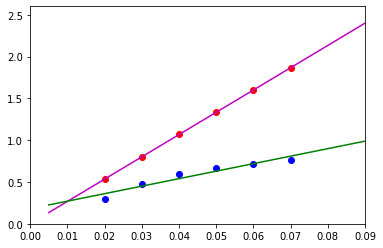

R2:  0.9170905701236347
Solution found by UV-VIS:  8.97397142857143
R2:  0.9999930356120504
Solution found by Smartphone:  [26.64231293]


In [12]:
ynew = np.array([[0.29062,
0.4753,
0.59612,
0.66861,
0.7182,
0.75856,]]).T
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, ynew)
print( 'Solution found by scikit-learn  : ', regr.coef_ )
ynew_pred = regr.coef_[0][0] + regr.coef_[0][1]*X
yn = regr.coef_[0][0] + regr.coef_[0][1]*x0

plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0, 'm')               # the fitting line
plt.plot(X.T, ynew.T, 'bo')
plt.plot(x0, yn, 'g')   
plt.axis([0, 0.09, 0, 2.6])
plt.show()
print('R2: ',r2_score(ynew, ynew_pred))
print( 'Solution found by UV-VIS: ', regr.coef_[0][1])
print('R2: ',r2_score(y, y_pred))
print( 'Solution found by Smartphone: ', w[1].T)

In [17]:
26.64/9.81

2.715596330275229